In [1]:
import pandas as pd

import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# 1. DNN

In [2]:
df = pd.read_csv("dnn_train_loss.csv")
df.columns, len(df.columns)

(Index(['Unnamed: 0', 'val_loss', 'val_slot0_loss', 'val_slot1_loss',
        'val_slot2_loss', 'val_slot3_loss', 'val_slot4_loss', 'val_slot5_loss',
        'val_slot6_loss', 'val_slot0_accuracy', 'val_slot1_accuracy',
        'val_slot2_accuracy', 'val_slot3_accuracy', 'val_slot4_accuracy',
        'val_slot5_accuracy', 'val_slot6_accuracy', 'loss', 'slot0_loss',
        'slot1_loss', 'slot2_loss', 'slot3_loss', 'slot4_loss', 'slot5_loss',
        'slot6_loss', 'slot0_accuracy', 'slot1_accuracy', 'slot2_accuracy',
        'slot3_accuracy', 'slot4_accuracy', 'slot5_accuracy', 'slot6_accuracy'],
       dtype='object'),
 31)

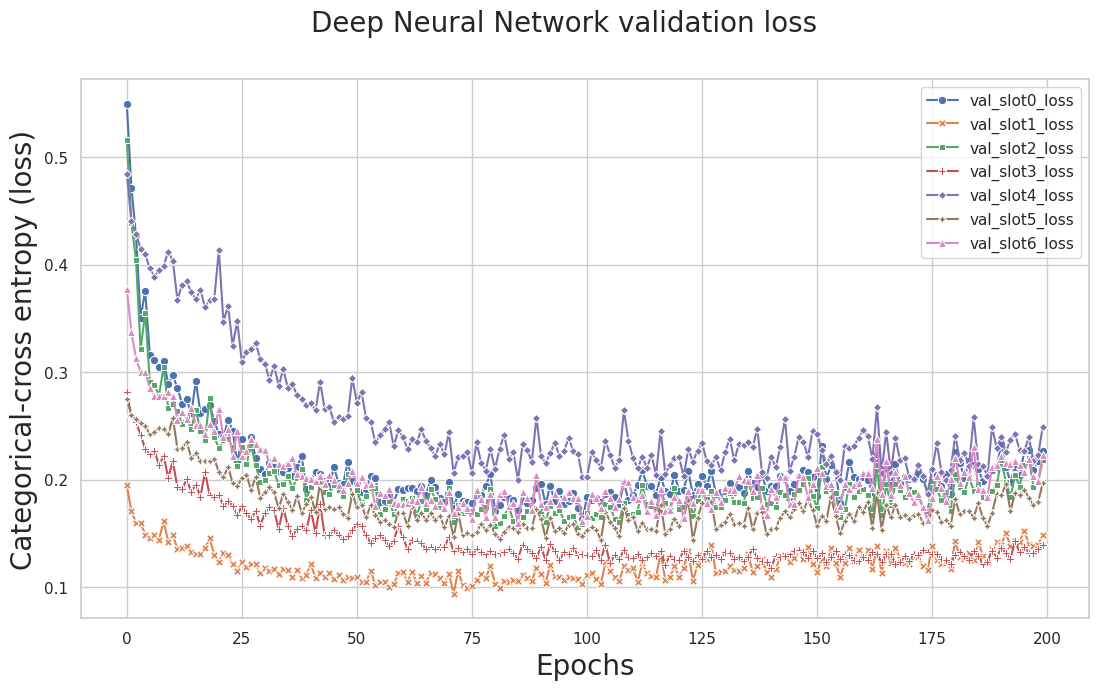

In [3]:
to_keep = []
for c in df.columns:
    if "loss" in c and "val_slot" in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_val_loss = df.drop(to_drop,axis=1)

sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_val_loss,markers=True, dashes=False)
fig.suptitle('Deep Neural Network validation loss ', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Categorical-cross entropy (loss)", fontsize=20)
plt.legend(loc='upper right')

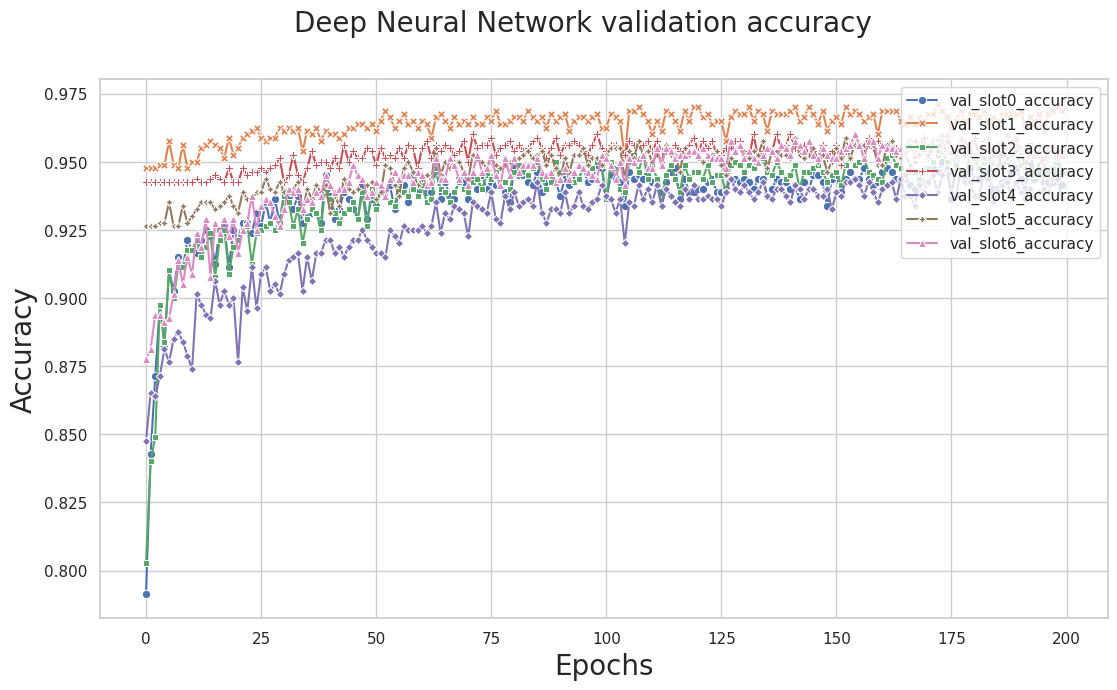

In [4]:
to_keep = []
for c in df.columns:
    if "accuracy" in c and "val_slot" in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_val_acc = df.drop(to_drop,axis=1)

sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_val_acc,markers=True, dashes=False)
fig.suptitle('Deep Neural Network validation accuracy ', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(loc='upper right')

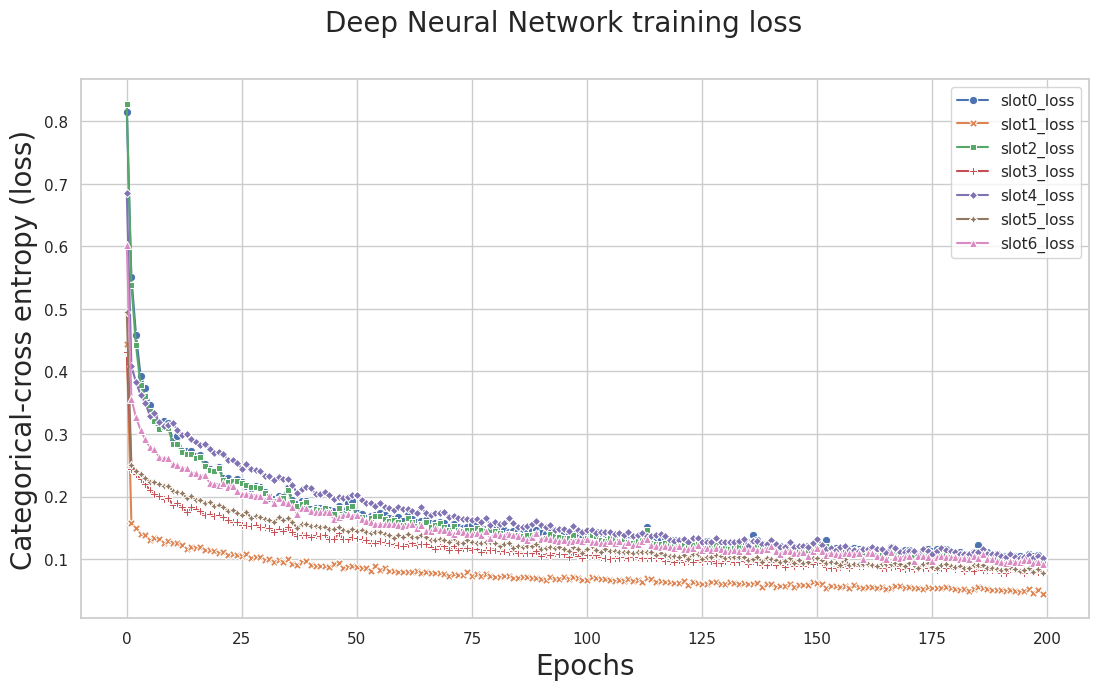

In [5]:
to_keep = []
for c in df.columns:
    if "loss" in c and "slot" in c and "val" not in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_loss = df.drop(to_drop,axis=1)

sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_loss,markers=True, dashes=False)
fig.suptitle('Deep Neural Network training loss ', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Categorical-cross entropy (loss)", fontsize=20)
plt.legend(loc='upper right')

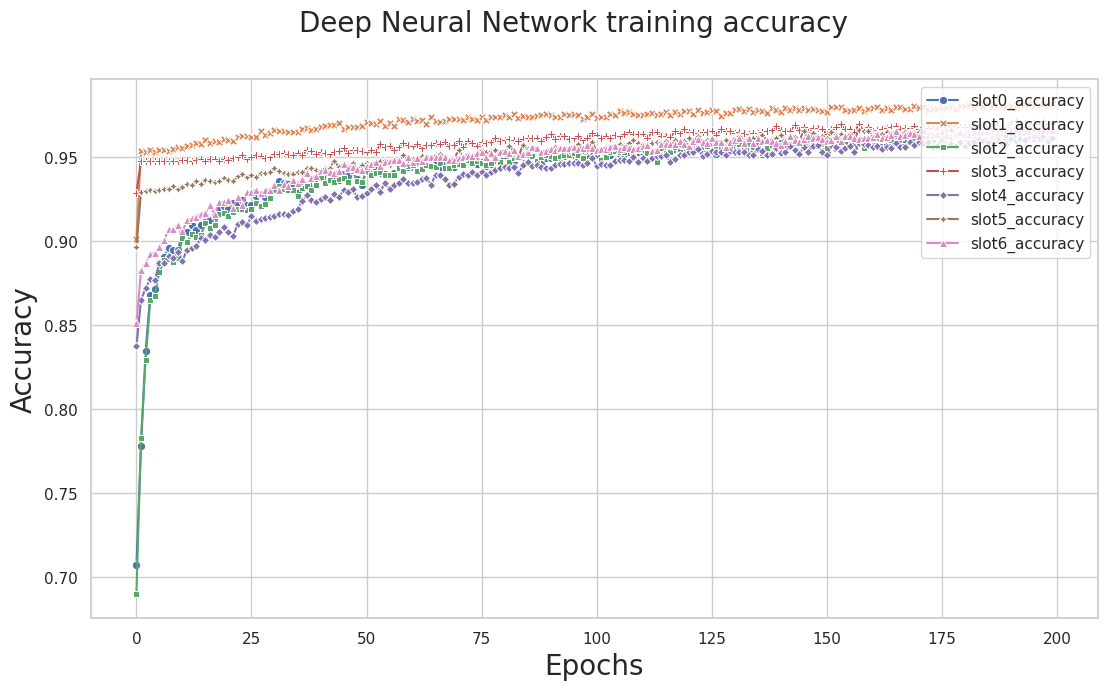

In [6]:
to_keep = []
for c in df.columns:
    if "slot" in c and "accuracy" in c and "val" not in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_acc = df.drop(to_drop,axis=1)
sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_acc,markers=True, dashes=False)
fig.suptitle('Deep Neural Network training accuracy ', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(loc='upper right')

# 2. MLP without edge features

In [7]:
df = pd.read_csv("mlp_edge_features_train_loss.csv")
df.columns, len(df.columns)

(Index(['Unnamed: 0', 'loss', 'mean_squared_error', 'val_loss',
        'val_mean_squared_error'],
       dtype='object'),
 5)

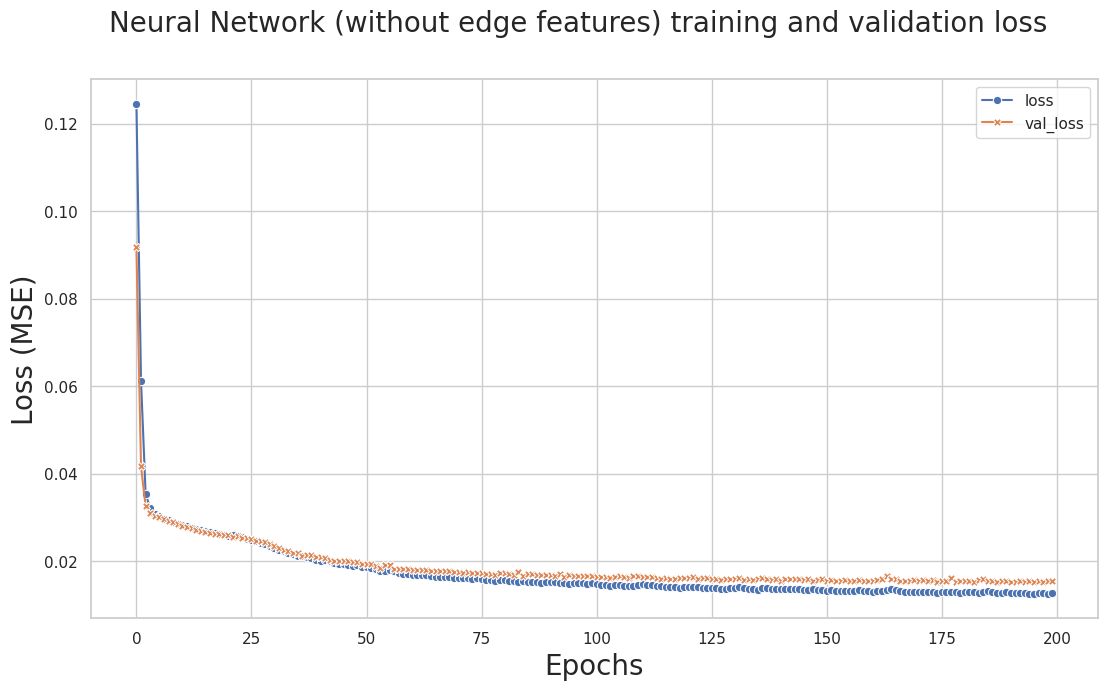

In [8]:
to_keep = []
for c in df.columns:
    if "loss" in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_loss = df.drop(to_drop,axis=1)
sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_loss,markers=True, dashes=False)
fig.suptitle('Neural Network (without edge features) training and validation loss', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Loss (MSE)", fontsize=20)
plt.legend(loc='upper right')

# 3. MLP with edge features

In [9]:
df = pd.read_csv("mlp_train_loss.csv")
df.columns, len(df.columns)

(Index(['Unnamed: 0', 'loss', 'mean_squared_error', 'val_loss',
        'val_mean_squared_error'],
       dtype='object'),
 5)

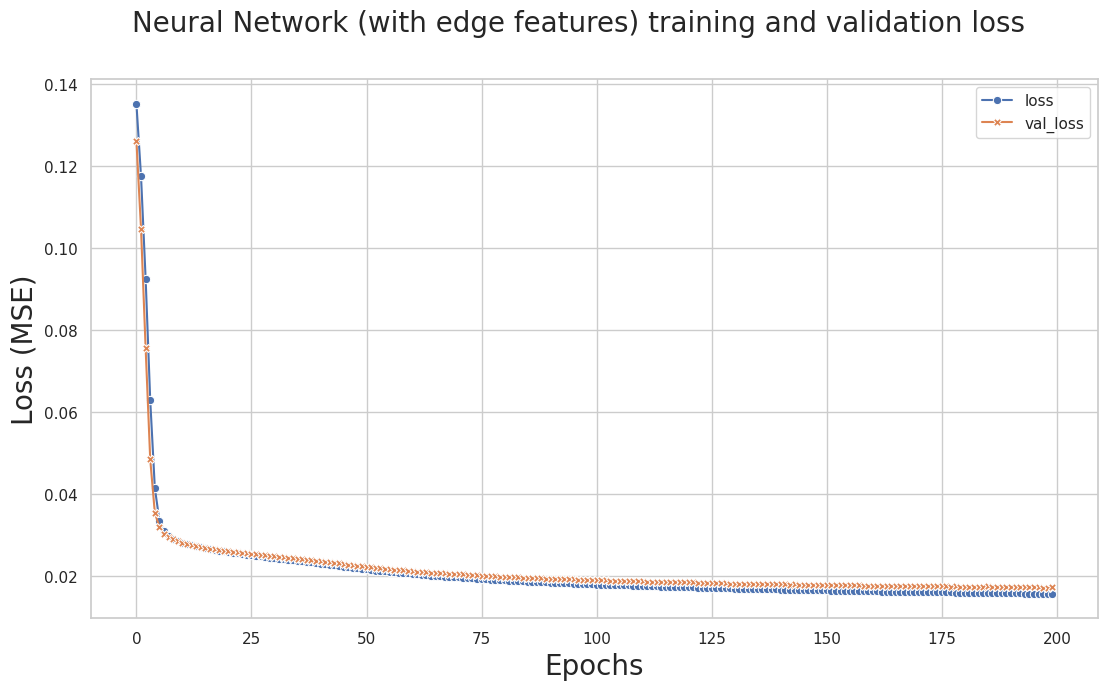

In [10]:
epochs=df['Unnamed: 0']+1
to_keep = []
for c in df.columns:
    if "loss" in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_loss = df.drop(to_drop,axis=1)
sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_loss,markers=True, dashes=False)
fig.suptitle('Neural Network (with edge features) training and validation loss', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Loss (MSE)", fontsize=20)
plt.legend(loc='upper right')

# 4. Compare training time

In [76]:
f = open("dnn_accuracy.txt","r")
lines = f.readlines()
f.close()
dnn_training_time = float(lines[-1].split(":")[1])
dnn_training_acc = float(lines[1].split(":")[1])
dnn_test_acc = float(lines[3].split(":")[1])

In [77]:
f = open("mlp_accuracy.txt","r")
lines = f.readlines()
f.close()
mlp_training_time = float(lines[-1].split(":")[1])
mlp_training_acc = float(lines[0].split(":")[1])
mlp_test_acc = float(lines[1].split(":")[1])

In [78]:
f = open("mlp_edge_features_accuracy.txt","r")
lines = f.readlines()
f.close()
mlp_edge_training_time = float(lines[-1].split(":")[1])
mlp_edge_training_acc = float(lines[0].split(":")[1])
mlp_edge_test_acc = float(lines[1].split(":")[1])

In [83]:
df = pd.DataFrame()
# df["Model"] = ["Deep Neural Network","NN without edge features","NN with edge features"]
# df["Training time"] = [dnn_training_time,mlp_training_time,mlp_edge_training_time]
# df["Training Accuracy"] = [dnn_training_acc,mlp_training_acc,mlp_edge_training_acc]
# df["Test Accuracy"] = [dnn_test_acc,mlp_test_acc,mlp_edge_test_acc]

df["Model"] = ["DNN","GNN"]
df["Training time"] = [dnn_training_time,mlp_edge_training_time]
df["Training Accuracy"] = [dnn_training_acc,mlp_edge_training_acc]
df["Test Accuracy"] = [dnn_test_acc,mlp_edge_test_acc]

df = df.round(4)
df

,Model,Training time,Training Accuracy,Test Accuracy
0,DNN,125.5341,0.9569,0.9393
1,GNN,6.0549,0.9013,0.8978


Text(0, 0.5, 'Training Time (sec)')

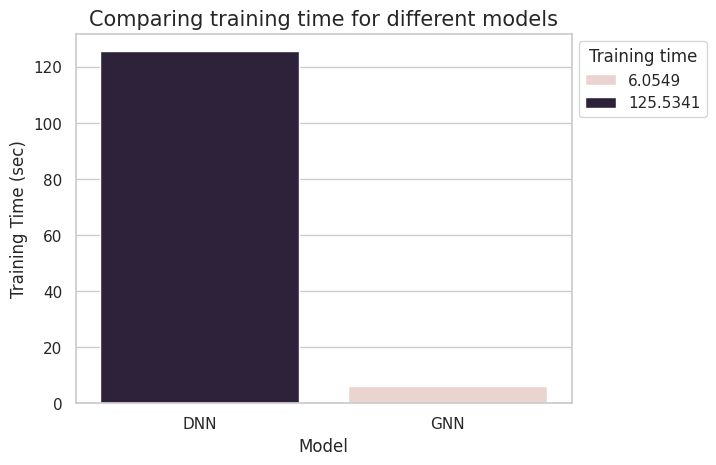

In [87]:
ax = sns.barplot(x="Model", y="Training time",hue="Training time", data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Comparing training time for different models', fontsize=15)

plt.xticks(rotation=0)
plt.ylabel("Training Time (sec)", fontsize=12)

Text(0, 0.5, 'Training Accuracy')

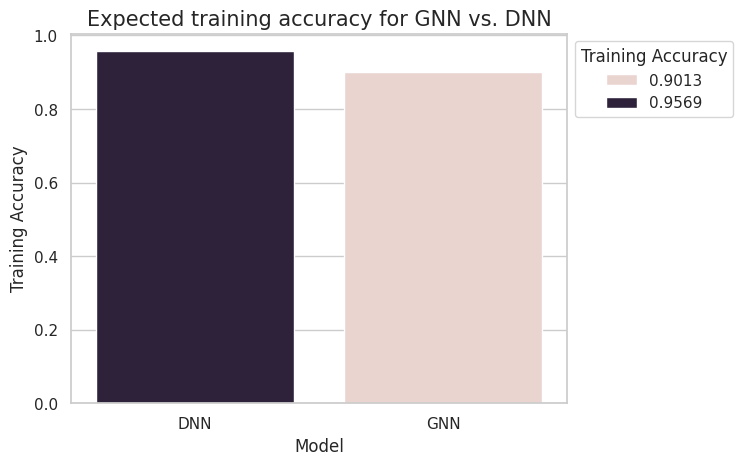

In [91]:
ax = sns.barplot(x="Model", y="Training Accuracy",hue="Training Accuracy", data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Expected training accuracy for GNN vs. DNN', fontsize=15)

plt.xticks(rotation=0)
plt.ylabel("Training Accuracy", fontsize=12)

Text(0, 0.5, 'Test Accuracy')

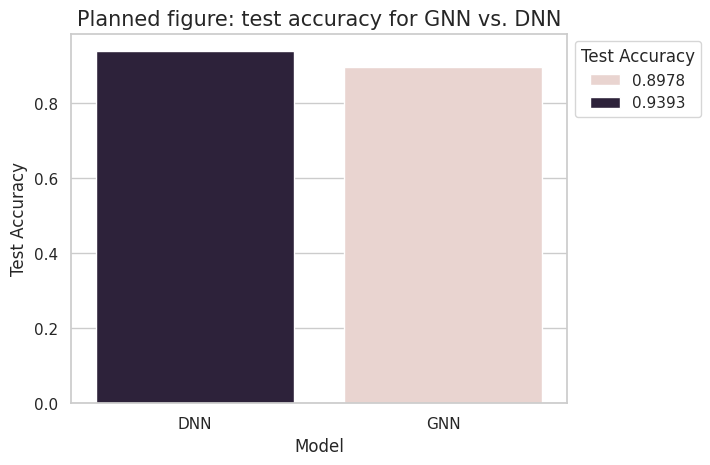

In [93]:
ax = sns.barplot(x="Model", y="Test Accuracy",hue="Test Accuracy", data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Planned figure: test accuracy for GNN vs. DNN', fontsize=15)
plt.xticks(rotation=0)
plt.ylabel("Test Accuracy", fontsize=12)

# 5. Parameters

In [22]:
import tensorflow as tf
from tensorflow import keras
dnn = tf.keras.models.load_model("dnn.keras")
mlp = tf.keras.models.load_model("mlp.keras")
mlp_ef = tf.keras.models.load_model("mlp_edge_features.keras")


In [21]:
dnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 89)]         0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 264)          23760       input[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1024)         271360      dense_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 1024)         0           dense_2[0][0]                    
____________________________________________________________________________________________

In [23]:
mlp.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 89)]              0         
_________________________________________________________________
dense (Dense)                (None, 70)                6300      
_________________________________________________________________
dense_1 (Dense)              (None, 49)                3479      
Total params: 9,779
Trainable params: 9,779
Non-trainable params: 0
_________________________________________________________________


In [24]:
mlp_ef.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 378)]             0         
_________________________________________________________________
dense (Dense)                (None, 189)               71631     
_________________________________________________________________
dense_1 (Dense)              (None, 94)                17860     
_________________________________________________________________
dense_2 (Dense)              (None, 49)                4655      
Total params: 94,146
Trainable params: 94,146
Non-trainable params: 0
_________________________________________________________________


In [25]:
# n=127
# ip_features_dnn = n*(n-1)+3*n+4*n
# ip_features_mlp_no_edge = n*(n-1)+3*n+4*n
# ip_features_mlp_edge = 9*n*(n-1)


In [26]:
N = 500
def get_param_count_dnn(n):
    ip_features_dnn = n*(n-1)+3*n+4*n
    layers = [ip_features_dnn, ip_features_dnn*4, ip_features_dnn*4*4]
    num_params = 0
    for i in range(1,len(layers)):
        num_params = num_params + (layers[i-1]+1)*layers[i]
        
    slot_layers = []
    curr_size = layers[-1]
    while curr_size >= (n):
        next_layer_size = int(curr_size/4)
        if next_layer_size > (n):
            slot_layers.append(next_layer_size)
            curr_size = next_layer_size
        else:
            slot_layers.append(n)
            break
        
    slot_num_params = 0
#     print(n,layers+slot_layers)
    for i in range(1,len(slot_layers)-1):
        slot_num_params = slot_num_params + (slot_layers[i-1]+1)*slot_layers[i]
    num_params = num_params + slot_num_params*n
    return num_params

In [27]:
dnn_params = []
for n in range(N):
    dnn_params.append(get_param_count_dnn(n))
# dnn_params

In [28]:
def get_param_count_nn(n):
    ip_features_mlp_no_edge = n*(n-1)+3*n+4*n
    layers = [ip_features_mlp_no_edge]
    curr_size = layers[0]
    while curr_size >= (n*n):
        next_layer_size = int(curr_size/1.2)
        if next_layer_size > (n*n):
            layers.append(next_layer_size)
            curr_size = next_layer_size
        else:
            layers.append(n*n)
            break
#     print(layers)
    print(layers)
    num_params = 0
    for i in range(1,len(layers)):
        num_params = num_params + (layers[i-1]+1)*layers[i]
    return num_params

In [29]:
nn_params = []
for n in range(N):
    nn_params.append(get_param_count_nn(n))
# nn_params

[0, 0]
[7, 5, 4, 3, 2, 1]
[16, 13, 10, 8, 6, 5, 4]
[27, 22, 18, 15, 12, 10, 9]
[40, 33, 27, 22, 18, 16]
[55, 45, 37, 30, 25]
[72, 60, 50, 41, 36]
[91, 75, 62, 51, 49]
[112, 93, 77, 64]
[135, 112, 93, 81]
[160, 133, 110, 100]
[187, 155, 129, 121]
[216, 180, 150, 144]
[247, 205, 170, 169]
[280, 233, 196]
[315, 262, 225]
[352, 293, 256]
[391, 325, 289]
[432, 360, 324]
[475, 395, 361]
[520, 433, 400]
[567, 472, 441]
[616, 513, 484]
[667, 555, 529]
[720, 600, 576]
[775, 645, 625]
[832, 693, 676]
[891, 742, 729]
[952, 793, 784]
[1015, 845, 841]
[1080, 900]
[1147, 961]
[1216, 1024]
[1287, 1089]
[1360, 1156]
[1435, 1225]
[1512, 1296]
[1591, 1369]
[1672, 1444]
[1755, 1521]
[1840, 1600]
[1927, 1681]
[2016, 1764]
[2107, 1849]
[2200, 1936]
[2295, 2025]
[2392, 2116]
[2491, 2209]
[2592, 2304]
[2695, 2401]
[2800, 2500]
[2907, 2601]
[3016, 2704]
[3127, 2809]
[3240, 2916]
[3355, 3025]
[3472, 3136]
[3591, 3249]
[3712, 3364]
[3835, 3481]
[3960, 3600]
[4087, 3721]
[4216, 3844]
[4347, 3969]
[4480, 4096]
[4

In [30]:
def get_param_count_nn_edge(n):
    ip_features_mlp_no_edge = 9*n*(n-1)
    layers = [ip_features_mlp_no_edge]
    curr_size = layers[0]
    while curr_size >= (n*n):
        next_layer_size = int(curr_size/2)
        if next_layer_size > (n*n):
            layers.append(next_layer_size)
            curr_size = next_layer_size
        else:
            layers.append(n*n)
            break
    num_params = 0
#     print(layers)
    for i in range(1,len(layers)):
        num_params = num_params + (layers[i-1]+1)*layers[i]
    return num_params

In [31]:
nn_edge_params = []
for n in range(N):
    nn_edge_params.append(get_param_count_nn_edge(n))
# nn_params

In [32]:
df = pd.DataFrame()
df["Deep Neural Network"] = dnn_params
df["Neural Network without edge features"] = nn_params
df["Neural Network with edge features"] = nn_edge_params
df

,Deep Neural Network,Neural Network without edge features,Neural Network with edge features
0,0,0,0
1,3675,90,0
2,19944,562,211
3,59445,1736,1975
4,137000,3605,7819
...,...,...,...
495,134073229100580,60765219900,3245880506900
496,135418054675904,61256261888,3272216751046
497,136773413851109,61750273928,3298712037817
498,138139823436126,62247267972,3325367002595


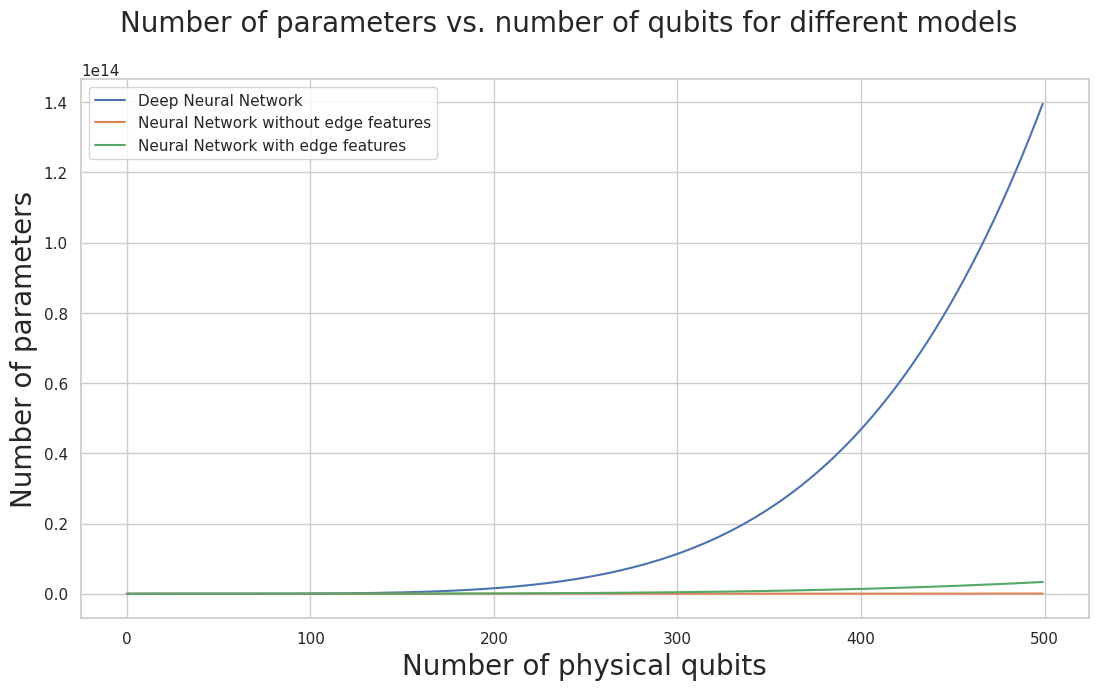

In [33]:
sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df,markers=False, dashes=False)

fig.suptitle('Number of parameters vs. number of qubits for different models', fontsize=20)
plt.xlabel("Number of physical qubits", fontsize=20)
plt.ylabel("Number of parameters", fontsize=20)
plt.legend(loc='upper left')

In [34]:
df.iloc[399]

Deep Neural Network                     46230335489121
Neural Network without edge features       25726244796
Neural Network with edge features        1368940760924
Name: 399, dtype: int64

Text(0, 0.5, 'Number of parameters')

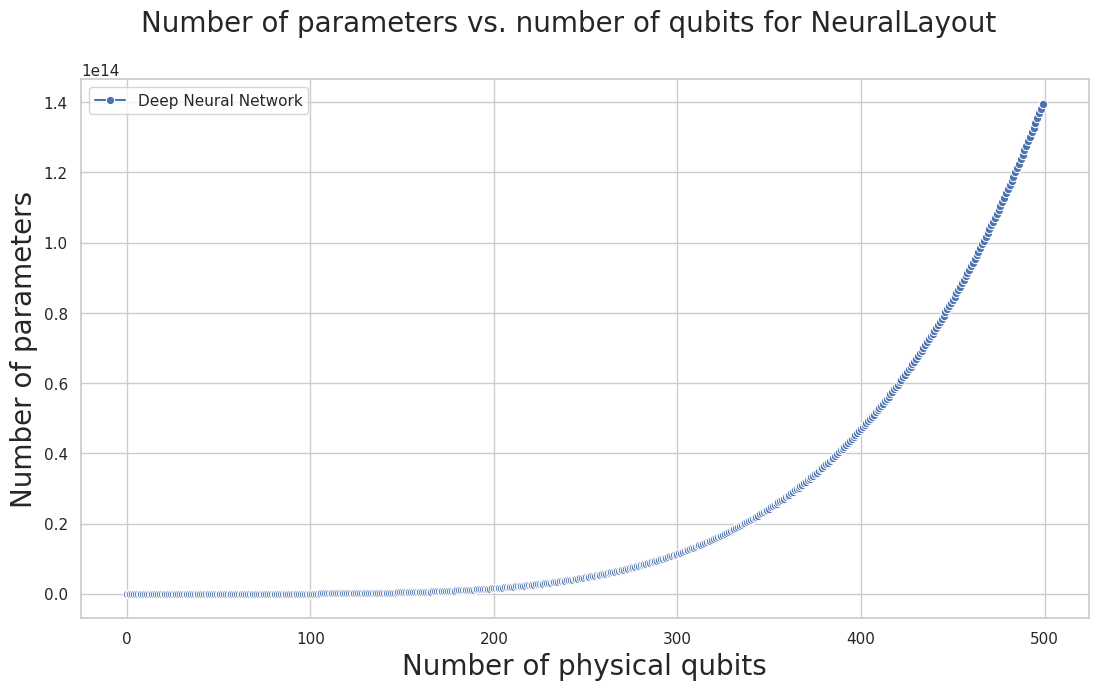

In [35]:
sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df[["Deep Neural Network"]],markers=True, dashes=False)

fig.suptitle('Number of parameters vs. number of qubits for NeuralLayout', fontsize=20)
plt.xlabel("Number of physical qubits", fontsize=20)
plt.ylabel("Number of parameters", fontsize=20)
# plt.legend(loc='upper left')

,Log parameters
0,8.209308
1,9.900684
2,10.992807
3,11.827736
4,12.510667
...,...
494,32.529407
495,32.539388
496,32.549347
497,32.559288


Text(0, 0.5, 'Number of parameters')

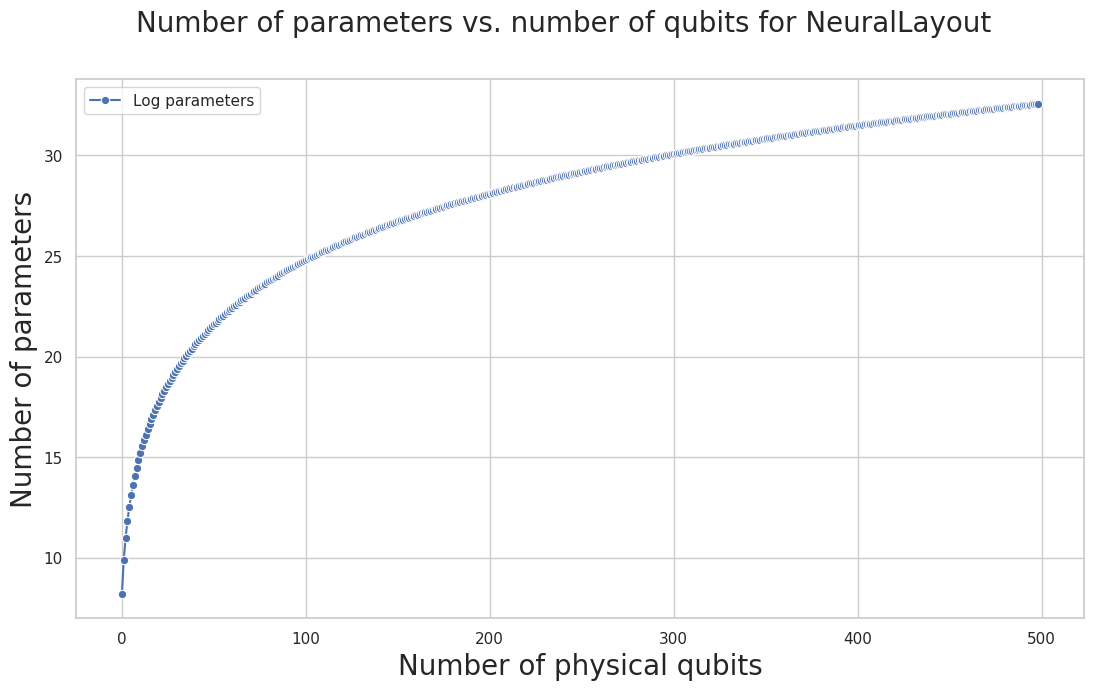

In [36]:
df = pd.DataFrame()
df["Deep Neural Network"] = dnn_params


params = np.array(df[['Deep Neural Network']])
param_log = np.log(params[1:])
df = pd.DataFrame()
df["Log parameters"] = param_log.flatten().tolist()
display(df)
sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df,markers=True, dashes=False)

fig.suptitle('Number of parameters vs. number of qubits for NeuralLayout', fontsize=20)
plt.xlabel("Number of physical qubits", fontsize=20)
plt.ylabel("Number of parameters", fontsize=20)

# 6. Mapping vs. depth

In [37]:
df = pd.read_csv("mapping_vs_depth.csv")

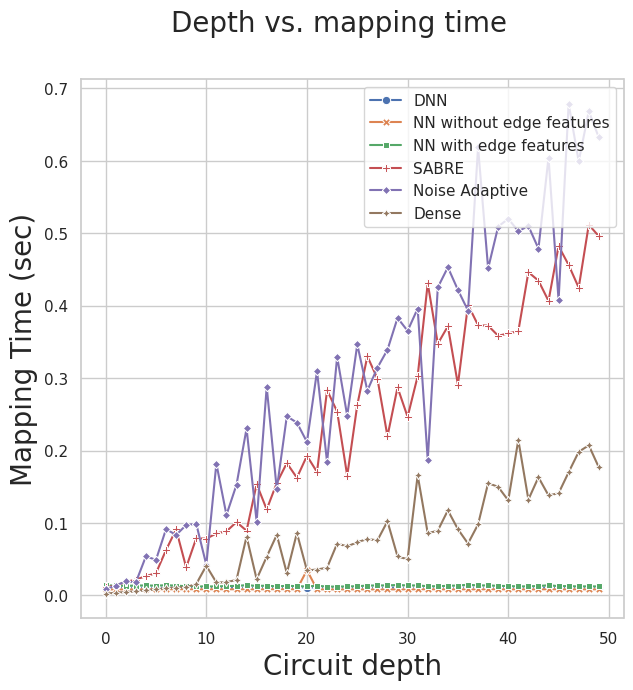

In [38]:
sns.set_theme(style="whitegrid")
a4_dims = (7,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df,markers=True, dashes=False)
fig.suptitle('Depth vs. mapping time ', fontsize=20)
plt.xlabel("Circuit depth", fontsize=20)
plt.ylabel("Mapping Time (sec)", fontsize=20)
plt.legend(loc='upper right')



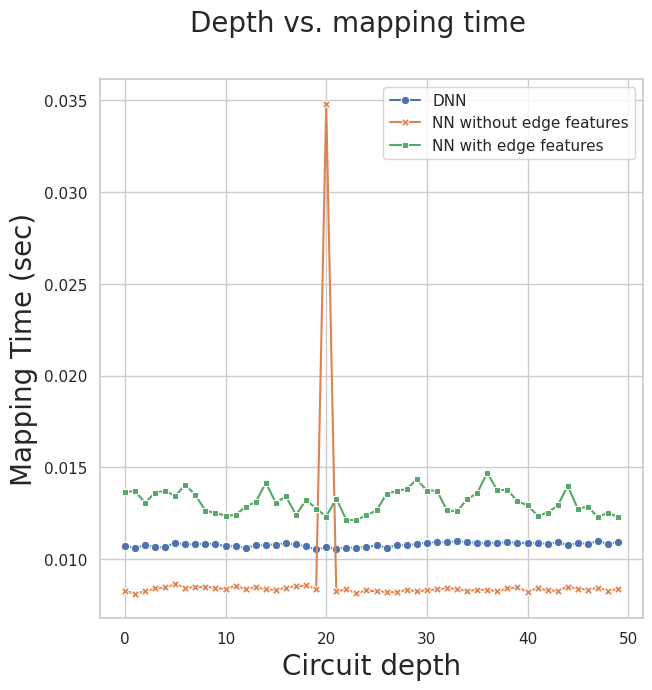

In [39]:
sns.set_theme(style="whitegrid")
a4_dims = (7,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df[["DNN","NN without edge features","NN with edge features"]],markers=True, dashes=False)
fig.suptitle('Depth vs. mapping time ', fontsize=20)
plt.xlabel("Circuit depth", fontsize=20)
plt.ylabel("Mapping Time (sec)", fontsize=20)
plt.legend(loc='upper right')



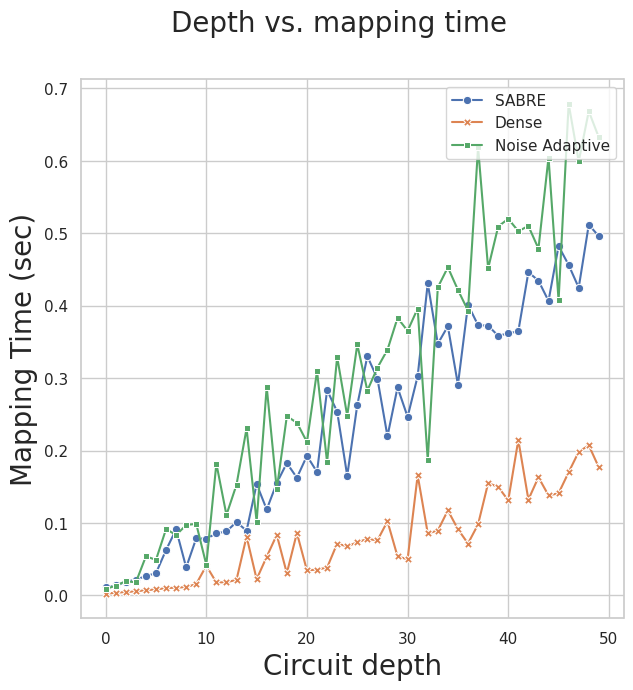

In [40]:
sns.set_theme(style="whitegrid")
a4_dims = (7,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df[["SABRE","Dense","Noise Adaptive"]],markers=True, dashes=False)
fig.suptitle('Depth vs. mapping time ', fontsize=20)
plt.xlabel("Circuit depth", fontsize=20)
plt.ylabel("Mapping Time (sec)", fontsize=20)
plt.legend(loc='upper right')

# 7. Test result plot

In [223]:
df = pd.read_csv("test_dataset_result.csv")
df

,Label Depth,Label CNOTs,NN without edge features Depth,NN without edge features CNOTs,NN with edge features Depth,NN with edge features CNOTs,DNN without repair Depth,DNN without repair CNOTs,DNN with repair Depth,DNN with repair CNOTs,DNN Mapping time,NN without edge features Mapping time,NN with edge features Mapping time,SABRE mapping Mapping time,Noise Adaptive Mapping time,Dense Mapping time
0,4,0,NaN,NaN,4,0,4,0,4,0,0.078208,0.015203,0.018455,0.002484,0.001102,0.000952
1,4,0,NaN,NaN,4,0,4,0,4,0,0.010132,0.008147,0.010104,0.002519,0.001133,0.000990
2,4,0,NaN,NaN,4,0,4,0,4,0,0.010487,0.008654,0.011545,0.002487,0.001095,0.000977
3,4,0,NaN,NaN,4,0,4,0,4,0,0.010625,0.008442,0.011248,0.002421,0.001128,0.000990
4,4,0,NaN,NaN,4,0,4,0,4,0,0.010722,0.008214,0.010117,0.002406,0.001117,0.000953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,118,87,NaN,NaN,118,84,118,84,118,84,0.010612,0.008516,0.011251,0.024014,0.028775,0.004647
1334,181,121,NaN,NaN,177,124,177,124,177,124,0.010664,0.008072,0.010273,0.033797,0.038161,0.006557
1335,189,136,NaN,NaN,184,139,184,139,184,139,0.010752,0.008301,0.010258,0.021771,0.043839,0.006778
1336,181,130,NaN,NaN,179,133,179,133,179,133,0.010767,0.008240,0.010450,0.035043,0.039954,0.006495


In [49]:
df = pd.read_csv("test_dataset_result.csv")

# df = df.sort_values('Label Depth')
# df.set_index('Label Depth', inplace=True)
# group_df=df.groupby(['Label Depth']).mean()
# group_df.reset_index(drop=False, inplace=True)
# display(group_df)
# print(group_df.columns)

In [101]:
df = pd.read_csv("test_dataset_result.csv")

bin_depth = []
for i in range(len(df)):
    d = df["Label Depth"][i]
    for bin_size in range(5):
        if bin_size*1000 <= d < (bin_size+1)*1000:
            bin_depth.append(bin_size)
            break

print(len(bin_depth),len(df))
#     if d < 500:
#         bin_depth.append(0)
#     elif 500 <= d < 1000:
#         bin_depth.append(1)
#     elif 1000 <= d < 1500:
#         bin_depth.append(2)
#     elif 1500 <= d < 2000:
#         bin_depth.append(3)
#     elif 1500 <= d < 2000:
#         bin_depth.append(4)
#     else:
#         bin_depth.append(5)
df["Binned depth"] = bin_depth

1338 1338


In [102]:
df=df.groupby(['Binned depth']).mean()
df.reset_index(drop=False, inplace=True)
df.rename(columns={'DNN with repair Depth': 'DNN Depth', 'DNN with repair CNOTs': 'DNN CNOTs'}, inplace=True)

In [104]:
df[['Label Depth', 'Label CNOTs',  'DNN Depth',
       'DNN CNOTs']]

,Label Depth,Label CNOTs,DNN Depth,DNN CNOTs
0,277.761798,200.685393,275.096629,196.943820
1,1539.020833,1197.911458,1540.833333,1209.833333
2,2329.046875,1943.765625,2385.500000,1995.000000
3,3446.153153,2891.612613,3555.837838,2996.018018
4,4586.740741,3869.419753,4694.000000,3965.456790


In [224]:
df.columns

Index(['Label Depth', 'Label CNOTs', 'NN without edge features Depth',
       'NN without edge features CNOTs', 'NN with edge features Depth',
       'NN with edge features CNOTs', 'DNN without repair Depth',
       'DNN without repair CNOTs', 'DNN with repair Depth',
       'DNN with repair CNOTs', 'DNN Mapping time',
       'NN without edge features Mapping time',
       'NN with edge features Mapping time', 'SABRE mapping Mapping time',
       'Noise Adaptive Mapping time', 'Dense Mapping time'],
      dtype='object')

,Label CNOTs,NN without edge features Depth,NN without edge features CNOTs,NN with edge features Depth,NN with edge features CNOTs,DNN without repair Depth,DNN without repair CNOTs,DNN with repair Depth,DNN with repair CNOTs,DNN Mapping time,NN without edge features Mapping time,NN with edge features Mapping time,SABRE mapping Mapping time,Noise Adaptive Mapping time,Dense Mapping time
0,0.000000,NaN,NaN,4.000000,0.000000,4.000000,0.000000,4.000000,0.000000,0.020211,0.009277,0.011812,0.002462,0.001123,0.000974
1,2.285714,NaN,NaN,5.428571,1.428571,5.428571,1.428571,5.428571,1.428571,0.010694,0.008501,0.010795,0.002856,0.001567,0.001067
2,2.000000,NaN,NaN,6.000000,2.000000,6.000000,2.000000,6.000000,2.000000,0.010567,0.008405,0.009998,0.003282,0.001210,0.001041
3,4.000000,NaN,NaN,6.800000,2.800000,6.800000,2.800000,6.800000,2.800000,0.011692,0.009143,0.010688,0.003503,0.001308,0.001131
4,6.666667,NaN,NaN,9.500000,5.666667,9.500000,5.666667,9.500000,5.666667,0.010631,0.008317,0.010359,0.003966,0.002734,0.001244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,4035.000000,NaN,NaN,4872.625000,4113.000000,4872.625000,4113.000000,4872.625000,4113.000000,0.010822,0.008491,0.010410,0.804269,0.508943,0.168197
327,4014.000000,NaN,NaN,4873.000000,4113.000000,4873.000000,4113.000000,4873.000000,4113.000000,0.010808,0.008592,0.010169,0.913121,0.145025,0.140551
328,4014.000000,NaN,NaN,4874.000000,4113.000000,4874.000000,4113.000000,4874.000000,4113.000000,0.011159,0.008970,0.011009,0.660208,0.141301,0.361075
329,4128.000000,NaN,NaN,4868.000000,4113.000000,4868.000000,4113.000000,4868.000000,4113.000000,0.011183,0.008738,0.010053,0.926862,1.132731,0.140475


Index(['Label CNOTs', 'NN without edge features Depth',
       'NN without edge features CNOTs', 'NN with edge features Depth',
       'NN with edge features CNOTs', 'DNN without repair Depth',
       'DNN without repair CNOTs', 'DNN with repair Depth',
       'DNN with repair CNOTs', 'DNN Mapping time',
       'NN without edge features Mapping time',
       'NN with edge features Mapping time', 'SABRE mapping Mapping time',
       'Noise Adaptive Mapping time', 'Dense Mapping time'],
      dtype='object')


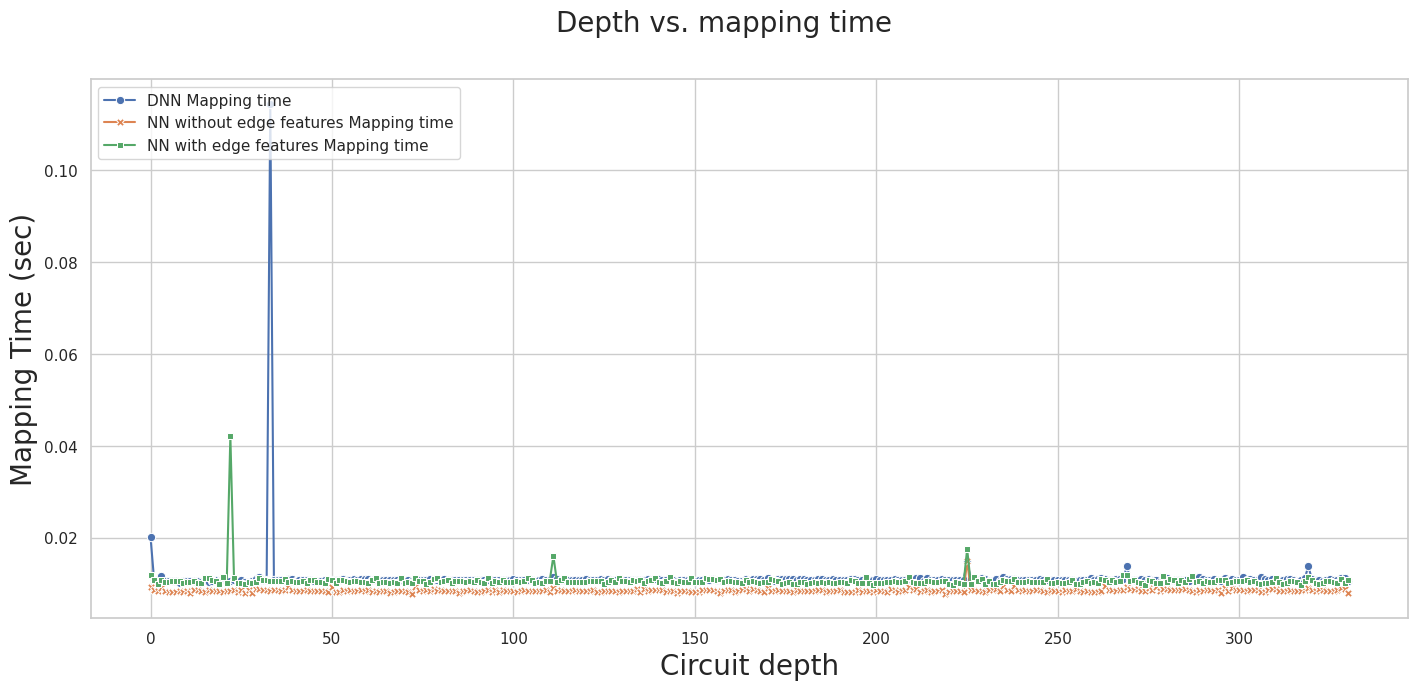

In [253]:
df = pd.read_csv("test_dataset_result.csv")

# df = df.sort_values('Label Depth')
# df.set_index('Label Depth', inplace=True)
df=df.groupby(['Label Depth']).mean()
df.reset_index(drop=True, inplace=True)
display(df)
print(df.columns)

# timings = ['DNN Mapping time',
#        'NN without edge features Mapping time',
#        'NN with edge features Mapping time', 'SABRE mapping Mapping time',
#        'Noise Adaptive Mapping time', 'Dense Mapping time']

timings = ['DNN Mapping time','NN without edge features Mapping time',
       'NN with edge features Mapping time']
# print(df[timings])
sns.set_theme(style="whitegrid")
a4_dims = (17,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df[timings],markers=True, dashes=False)
fig.suptitle('Depth vs. mapping time ', fontsize=20)
plt.xlabel("Circuit depth", fontsize=20)
plt.ylabel("Mapping Time (sec)", fontsize=20)
plt.legend(loc='upper left')

In [254]:
import scipy.signal

In [262]:
# df = pd.read_csv("test_dataset_result.csv")

# # df = df.sort_values('Label Depth')
# df.set_index('Label Depth', inplace=True)
# display(df)
# timings = ['DNN Mapping time','NN with edge features Depth',
#        'NN without edge features Mapping time',
#        'NN with edge features Mapping time', 'SABRE mapping Mapping time',
#        'Noise Adaptive Mapping time', 'Dense Mapping time']

# sns.set_theme(style="whitegrid")
# a4_dims = (17,7)
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.lineplot(data = df[timings],markers=True, dashes=False)
# fig.suptitle('Depth vs. mapping time ', fontsize=20)
# plt.xlabel("Circuit depth", fontsize=20)
# plt.ylabel("Mapping Time (sec)", fontsize=20)
# plt.legend(loc='upper left')

In [260]:
df.columns

Index(['Label CNOTs', 'NN without edge features Depth',
       'NN without edge features CNOTs', 'NN with edge features Depth',
       'NN with edge features CNOTs', 'DNN without repair Depth',
       'DNN without repair CNOTs', 'DNN with repair Depth',
       'DNN with repair CNOTs', 'DNN Mapping time',
       'NN without edge features Mapping time',
       'NN with edge features Mapping time', 'SABRE mapping Mapping time',
       'Noise Adaptive Mapping time', 'Dense Mapping time'],
      dtype='object')

In [270]:
df = pd.read_csv("test_dataset_result.csv")

# df = df.sort_values('Label Depth')
# df.set_index('Label Depth', inplace=True)
df=df.groupby(['Label Depth']).mean()
df.reset_index(drop=True, inplace=True)
display(df)
print(df.columns)
shift_by = 20
df['DNN Mapping time smooth'] = df['DNN Mapping time'].rolling(shift_by).sum().shift(-shift_by)
df['NN without edge features Mapping time smooth'] = df['NN without edge features Mapping time'].rolling(shift_by).sum().shift(-shift_by)
df['NN with edge features Mapping time smooth'] = df['NN with edge features Mapping time'].rolling(shift_by).sum().shift(-shift_by)

,Label CNOTs,NN without edge features Depth,NN without edge features CNOTs,NN with edge features Depth,NN with edge features CNOTs,DNN without repair Depth,DNN without repair CNOTs,DNN with repair Depth,DNN with repair CNOTs,DNN Mapping time,NN without edge features Mapping time,NN with edge features Mapping time,SABRE mapping Mapping time,Noise Adaptive Mapping time,Dense Mapping time
0,0.000000,NaN,NaN,4.000000,0.000000,4.000000,0.000000,4.000000,0.000000,0.020211,0.009277,0.011812,0.002462,0.001123,0.000974
1,2.285714,NaN,NaN,5.428571,1.428571,5.428571,1.428571,5.428571,1.428571,0.010694,0.008501,0.010795,0.002856,0.001567,0.001067
2,2.000000,NaN,NaN,6.000000,2.000000,6.000000,2.000000,6.000000,2.000000,0.010567,0.008405,0.009998,0.003282,0.001210,0.001041
3,4.000000,NaN,NaN,6.800000,2.800000,6.800000,2.800000,6.800000,2.800000,0.011692,0.009143,0.010688,0.003503,0.001308,0.001131
4,6.666667,NaN,NaN,9.500000,5.666667,9.500000,5.666667,9.500000,5.666667,0.010631,0.008317,0.010359,0.003966,0.002734,0.001244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,4035.000000,NaN,NaN,4872.625000,4113.000000,4872.625000,4113.000000,4872.625000,4113.000000,0.010822,0.008491,0.010410,0.804269,0.508943,0.168197
327,4014.000000,NaN,NaN,4873.000000,4113.000000,4873.000000,4113.000000,4873.000000,4113.000000,0.010808,0.008592,0.010169,0.913121,0.145025,0.140551
328,4014.000000,NaN,NaN,4874.000000,4113.000000,4874.000000,4113.000000,4874.000000,4113.000000,0.011159,0.008970,0.011009,0.660208,0.141301,0.361075
329,4128.000000,NaN,NaN,4868.000000,4113.000000,4868.000000,4113.000000,4868.000000,4113.000000,0.011183,0.008738,0.010053,0.926862,1.132731,0.140475


Index(['Label CNOTs', 'NN without edge features Depth',
       'NN without edge features CNOTs', 'NN with edge features Depth',
       'NN with edge features CNOTs', 'DNN without repair Depth',
       'DNN without repair CNOTs', 'DNN with repair Depth',
       'DNN with repair CNOTs', 'DNN Mapping time',
       'NN without edge features Mapping time',
       'NN with edge features Mapping time', 'SABRE mapping Mapping time',
       'Noise Adaptive Mapping time', 'Dense Mapping time'],
      dtype='object')


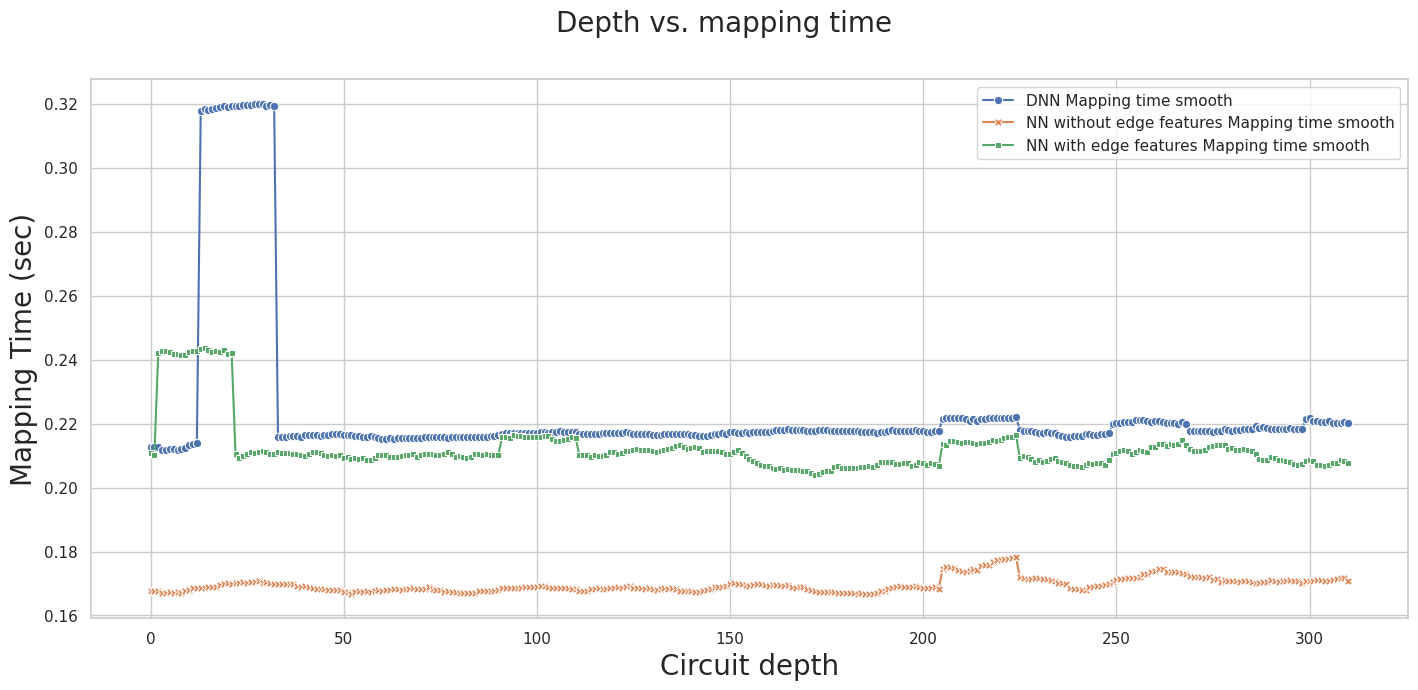

In [271]:
timings = ['DNN Mapping time smooth','NN without edge features Mapping time smooth',
       'NN with edge features Mapping time smooth']
# print(df[timings])
sns.set_theme(style="whitegrid")
a4_dims = (17,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df[timings],markers=True, dashes=False)
fig.suptitle('Depth vs. mapping time ', fontsize=20)
plt.xlabel("Circuit depth", fontsize=20)
plt.ylabel("Mapping Time (sec)", fontsize=20)
plt.legend(loc='upper right')

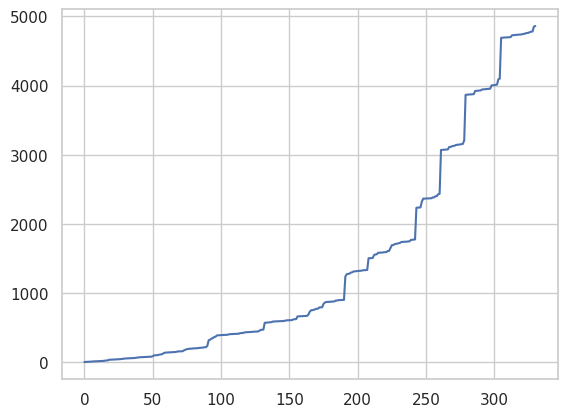

In [239]:
plt.plot(sorted(df['Label Depth'].unique()))

In [ ]:
# from keras.utils.vis_utils import plot_model
# from tensorflow.keras.utils import plot_model

In [ ]:
# dnn._layers = dnn._layers[:-1]
# plot_model(dnn, show_shapes=True, show_layer_names=True)


In [ ]:
df = pd.read_csv("test_dataset_result.csv")

# df = df.sort_values('Label Depth')
# df.set_index('Label Depth', inplace=True)
timings = ['Label Depth','NN with edge features Depth']

sns.set_theme(style="whitegrid")
a4_dims = (17,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df[timings],markers=True, dashes=False)
fig.suptitle('Depth vs. mapping time ', fontsize=20)
plt.xlabel("Circuit depth", fontsize=20)
plt.ylabel("Mapping Time (sec)", fontsize=20)
plt.legend(loc='upper left')

In [227]:
df['Label Depth'].unique()

KeyError: 'Label Depth'